In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 训练集读取，45146*30，其中有标签的15215*30
train_data = pd.read_csv('base_train_sum.csv', encoding = 'gbk')
train_data = pd.merge(train_data,pd.read_csv('knowledge_train_sum.csv', encoding = 'gbk'),how='left',on='ID')
train_data = pd.merge(train_data,pd.read_csv('money_report_train_sum.csv', encoding = 'gbk'),how='left',on='ID')
train_data = pd.merge(train_data,pd.read_csv('year_report_train_sum.csv', encoding = 'gbk'),how='left',on=['ID','year']) # 这样就能一起合并


# 验证集读取，96250*31，其中有标签的91732*30（注：比训练集多了一个控制人ID，官方回复测试集中不会加入这个特征，所以选择删除）
valid_data = pd.read_csv('base_verify1.csv', encoding = 'gbk')
valid_data = pd.merge(valid_data,pd.read_csv('paient_information_verify1.csv', encoding = 'gbk'),how='left',on='ID')
valid_data = pd.merge(valid_data,pd.read_csv('money_information_verify1.csv', encoding = 'gbk'),how='left',on='ID')
valid_data = pd.merge(valid_data,pd.read_csv('year_report_verify1.csv', encoding = 'gbk'),how='left',on=['ID','year'])
del valid_data['控制人ID']

# 合并为一个数据集，137796*30
data = pd.concat([train_data,valid_data],axis=0,sort=False,ignore_index=True)
data.columns = ['ID','Registration Time', 'Registered Capital', 'Industry', 'Region', 'Business Type', 'Controlling Type', 'Controlling Shareholding','flag', 'Patent', 'Trademark', 'Copyright', 'year', 'Debt financing line', 'Debt financing cost', 'Equity financing line', 'Equity financing cost', 'Internal financing and trade financing line', 'Internal financing and trade financing cost', 'Project financing and Policy financing quota ',' Project financing and policy financing costs', 'Number of employees',' Total assets', 'Total liabilities',' Total operating income ',' Main operating income ',' Total profit ' , 'Net Profit', 'Total Taxes', 'Total Owners Equity']

# 去flag=null的值，现在data:106947*30
data = data[~data['flag'].isnull()].reset_index(drop=True)
# 获取特征名
feature_name = [col for col in data.columns if col not in ['ID','flag']]
# 打乱数据
data = data.sample(frac=1).reset_index(drop=True)
# 去重
data = data.drop_duplicates(subset=None,keep='first',inplace=False)

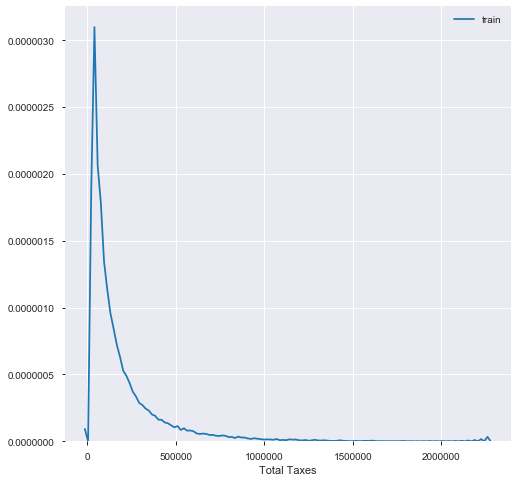

In [41]:
# 对重要特征Totol taxes的分析
fig, ax = plt.subplots(1,1,figsize=(8,8))
plt.subplot(1,1,1)
sns.distplot(data['Total Taxes'].fillna(0),hist=False,label='train') # 数据折线图

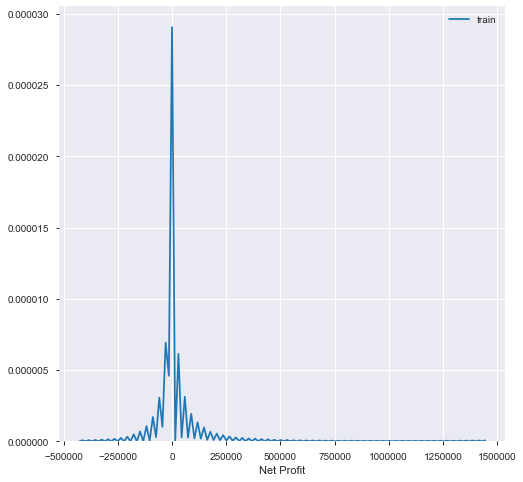

In [42]:
# 对重要特征Net Profit的分析
fig, ax = plt.subplots(1,1,figsize=(8,8))
plt.subplot(1,1,1)
sns.distplot(data['Net Profit'].fillna(0),hist=False,label='train') # 数据折线图

Wall time: 1.6 s


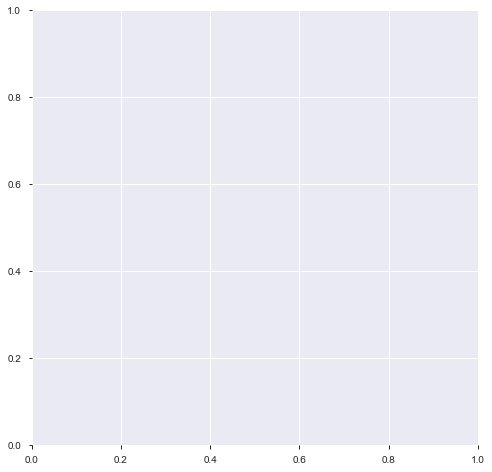

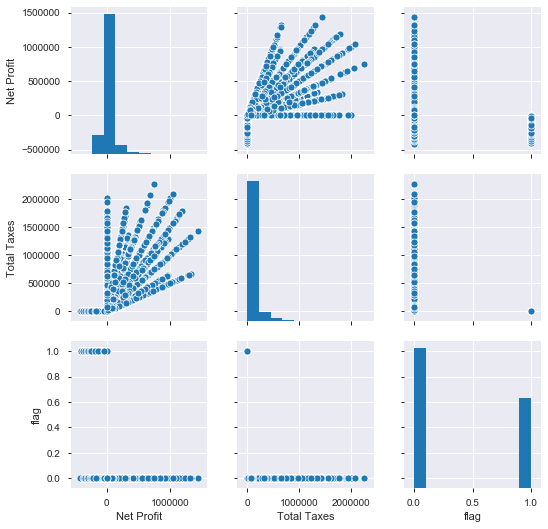

In [43]:
# 散点图
fig, ax = plt.subplots(1,1,figsize=(8,8))
plt.subplot(1,1,1)
%time sns.pairplot(data[['Net Profit', 'Total Taxes','flag']])

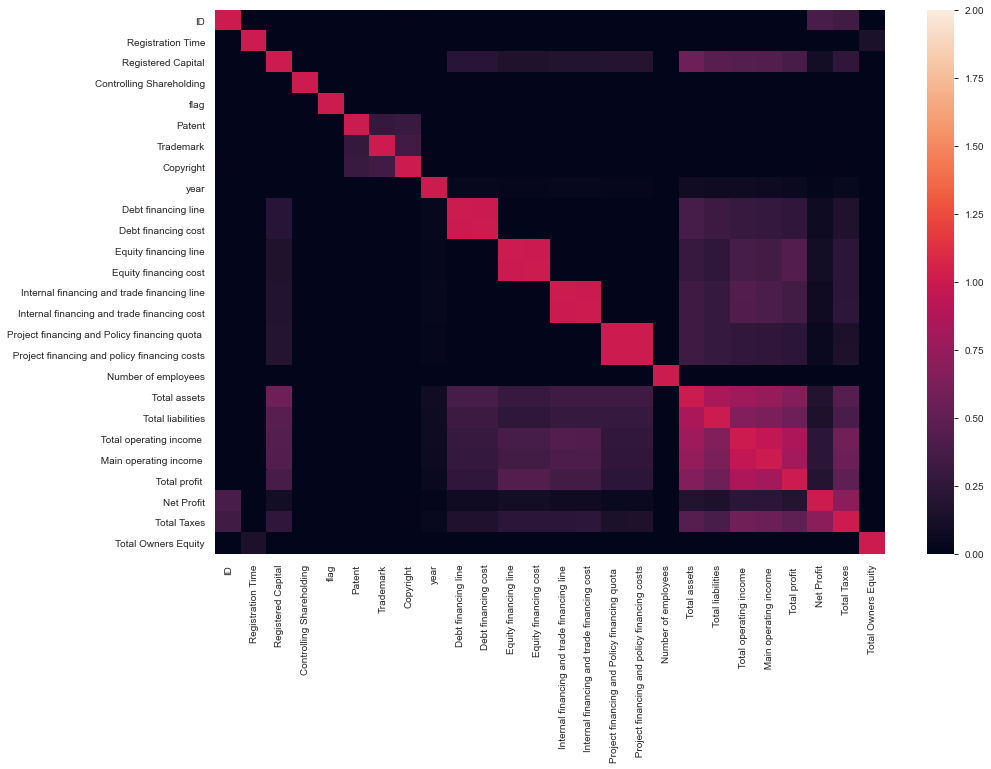

In [5]:
# 热力图分析特征相关性
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),vmin=0,vmax=2)

In [8]:
#检查是否有企业三年标签不一样的
a = list(set(valid_data['ID']))
p = valid_data.groupby('ID')
for ID in a:
    total_flag = p.get_group(ID)['flag'].sum()
    if total_flag!=3 and total_flag!=0:
        print('y有')
        print(total_flag)
print("done")

done


In [10]:
# 生成训练集数据报告
pfr = pandas_profiling.ProfileReport(train_data)
pfr.to_file('train_data_report.html')

In [11]:
# 生成验证集数据报告
pfr = pandas_profiling.ProfileReport(valid_data)
pfr.to_file('valid_data_report.html')

In [ ]:
# 生成总体数据报告
pfr = pandas_profiling.ProfileReport(data)
pfr.to_file('report.html')

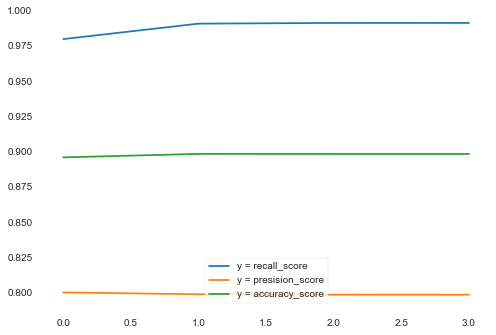

In [14]:
# 分数折线图
x = [i for i in range(4)]
# baseline, 特征工程, 参数调优, threshold调优
recall_score = np.array([0.979833, 0.990785, 0.991286, 0.991309])
precision_score = np.array([0.800062, 0.798771, 0.798485, 0.798458])
accuracy_score = np.array([0.89592, 0.898361, 0.898333, 0.898323])

plt.plot(x, recall_score, label='y = recall_score')
plt.plot(x, precision_score, label='y = presision_score')
plt.plot(x, accuracy_score, label='y = accuracy_score')
plt.legend()
plt.show()

[0.8899475 0.894778  0.8948855 0.8948835]


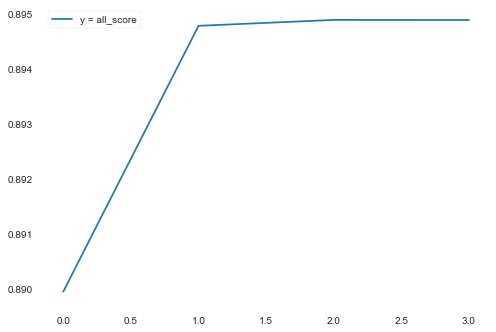

In [20]:
all_score = (recall_score + precision_score)/2
print(all_score)
plt.plot(x, all_score, label='y = all_score')
plt.legend()
plt.show()